### 一、任选一种分词工具（可以选用大语言模型作为分词工具）对五个文档分别进行分词和词性标注
#### 本处选用 jieba 分词工具来处理文档

##### 1、提取十六大-二十大报告 txt 文件

In [239]:
import os
file_lists=[]

def traverse_folder(folder_path):
    file_list = os.listdir(folder_path)
    for file_name in file_list:
        if 'txt' in file_name:
            print(file_name)
            file_lists.append(file_name)

# 调用文件夹
folder_path = 'E:\\Desktop\\学习资料\\2024-大三\\大三下\\自然语言处理\\分词\\十六大~二十大报告全文'  
traverse_folder(folder_path)

二十大报告全文.txt
十七大报告全文.txt
十九大报告全文.txt
十八大报告全文.txt
十六大报告全文.txt


##### 2、编写 segment_with_jieba 函数来进行分词和词性标注

In [240]:
import jieba.posseg as pseg

def segment_with_jieba(text):
    # 使用 jieba 进行分词和词性标注
    words = pseg.cut(text)
    result = []
    for word, flag in words:
        result.append((word, flag))
    return result

##### 3、对十六大-二十大报告 txt 文件进行分词和词性标注

In [241]:
for filename in file_lists:
    filename_temp = f'十六大~二十大报告全文\\{filename}'
    with open(filename_temp) as f_obj:
        text = f_obj.read()
    # print(text)
    segmented_result = segment_with_jieba(text)
    print(f'{filename} 已被分词和词性标注')

    name=filename.strip('全文.txt')

    filename_2=f'十六大~二十大报告分词结果\\{name}分词结果.txt'
    with open(filename_2,'w') as f_obj:
        for word, flag in segmented_result:
            f_obj.write(word+'/'+flag+' ')

二十大报告全文.txt 已被分词和词性标注
十七大报告全文.txt 已被分词和词性标注
十九大报告全文.txt 已被分词和词性标注
十八大报告全文.txt 已被分词和词性标注
十六大报告全文.txt 已被分词和词性标注


### 二、对分词结果去停止词，并进行词频统计，在实验报告中分别列出五个文档词频最高的30个名词及其词频

#### 1、首先整理[四个停词表](https://github.com/goto456/stopwords)的并集


In [242]:
import os
stopwords_lists=[]

def traverse_folder(folder_path):
    stopwords_list = os.listdir(folder_path)
    for file_name in stopwords_list:
        if 'txt' in file_name:
            print(file_name)
            stopwords_lists.append(file_name)

# 调用文件夹
folder_path = 'E:\\Desktop\\学习资料\\2024-大三\\大三下\\自然语言处理\\分词\\stopwords-master'  
traverse_folder(folder_path)

baidu_stopwords.txt
cn_stopwords.txt
hit_stopwords.txt
scu_stopwords.txt


#### 统计出停词表 stopwords

In [243]:
stopwords=[]
for filename in stopwords_lists:
    print(f'{filename} has been incorporated')
    filename_temp = f'stopwords-master\\{filename}'
    with open(filename_temp) as f_obj:
        text = f_obj.read()
    # print(text)
    for mes in text.split('\n'):
        stopwords.append(mes)

# print(stopwords)
# print(len(stopwords))
result=[]
for word in stopwords:
    if word not in result:
        result.append(word)
    else:
        continue
stopwords=result
# print(stopwords)
# print(len(stopwords))

baidu_stopwords.txt has been incorporated
cn_stopwords.txt has been incorporated
hit_stopwords.txt has been incorporated
scu_stopwords.txt has been incorporated


#### 获取分词结果文件名

In [244]:
import os
result_lists=[]

def traverse_folder(folder_path):
    result_list = os.listdir(folder_path)
    for file_name in result_list:
        if 'txt' in file_name:
            print(file_name)
            result_lists.append(file_name)

# 调用文件夹
folder_path = 'E:\\Desktop\\学习资料\\2024-大三\\大三下\\自然语言处理\\分词\\十六大~二十大报告分词结果'  
traverse_folder(folder_path)

二十大报告分词结果.txt
十七大报告分词结果.txt
十九大报告分词结果.txt
十八大报告分词结果.txt
十六大报告分词结果.txt


In [245]:
import json
top_nouns = {}
for filename in result_lists:
    filename_temp = f'十六大~二十大报告分词结果\\{filename}'
    with open(filename_temp) as f_obj:
        text = f_obj.read()
        # print(text)
    text_list=[]
    for i in text.split(" "):
        text_list.append(i.split("/")[0]) # 将其转变成列表

    # 去停止词
    fenci_result = [x for x in text_list if x not in stopwords]

    fenci_dict = {}
    for word in set(fenci_result):
        fenci_dict[word] = []
        # 词语出现频次
        count={'count':fenci_result.count(word)}
        fenci_dict[word].append(count)

        # 重新标注词性
        flag=segment_with_jieba(word)
        word_type={'word_type':flag[0][1]}
        fenci_dict[word].append(word_type)
        

    # 按照 count 的值进行排序（降序）
    sorted_dict = sorted(
        fenci_dict.items(),
        key=lambda item: item[1][0]["count"],
        reverse=True
    )
    
    # 获取前30个词频最高的30个名词及其词频
    top_nouns_temp = {}
    for key, value in sorted_dict:
        # 选取名词
        if 'n' in value[1]['word_type']:
            top_nouns_temp[key]= value[0]["count"]
        
        if len(top_nouns_temp) == 30:
            break

    top_nouns[f'{filename.strip('分词报告.txt')}']=top_nouns_temp

# for key,value in top_nouns.items():
#     print(f'{key}:\n{value}\n')


#### 2、用 json 文件储存

In [246]:
print(top_nouns)
write_back_file='统计词频.json'
with open(write_back_file,'w',encoding='utf-8') as f:
    json.dump(top_nouns,f,ensure_ascii=False,indent=4)

{'二十大报告分词结果': {'发展': 98, '社会主义': 83, '人民': 75, '中国': 72, '建设': 63, '国家': 60, '现代化': 51, '体系': 45, '党': 39, '时代': 34, '特色': 33, '战略': 32, '制度': 24, '文化': 23, '社会': 23, '世界': 21, '民主': 19, '政治': 19, '中国共产党': 18, '强国': 18, '中华民族': 17, '思想': 17, '精神': 17, '国际': 17, '领导': 17, '事业': 17, '经济': 16, '工作': 15, '历史': 14, '人才': 14}, '十七大报告分词结果': {'发展': 272, '建设': 175, '社会主义': 148, '中国': 116, '人民': 109, '社会': 98, '党': 73, '制度': 71, '特色': 64, '经济': 61, '文化': 59, '科学': 51, '改革': 48, '民主': 45, '工作': 42, '国家': 41, '政治': 39, '体系': 38, '改革开放': 33, '教育': 33, '管理': 32, '和平': 31, '群众': 31, '世界': 30, '关系': 28, '干部': 26, '事业': 26, '马克思主义': 25, '市场': 24, '统一': 23}, '十九大报告分词结果': {'发展': 212, '中国': 169, '人民': 157, '建设': 148, '社会主义': 147, '党': 112, '国家': 90, '制度': 83, '特色': 80, '政治': 80, '社会': 80, '体系': 68, '文化': 66, '时代': 64, '经济': 59, '现代化': 47, '民主': 44, '中华民族': 43, '工作': 42, '改革': 42, '战略': 36, '领导': 36, '世界': 34, '文明': 33, '生态': 32, '法治': 31, '生活': 30, '思想': 30, '教育': 30, '民族': 29}, '十八大报告分词结果': {'发展': 268, '

### 三、使用词云可视化工具，分别对每个文档词频最高的30个名词进行词云可视化

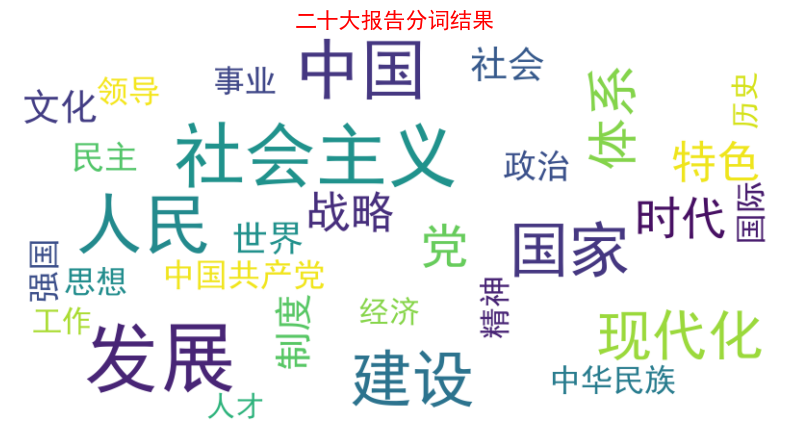

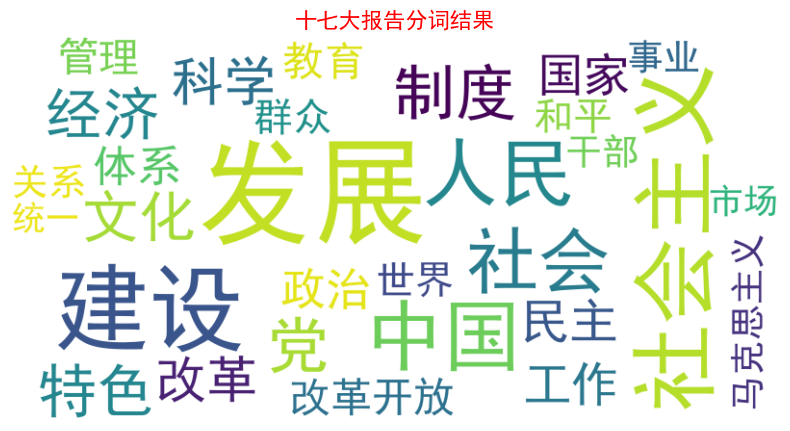

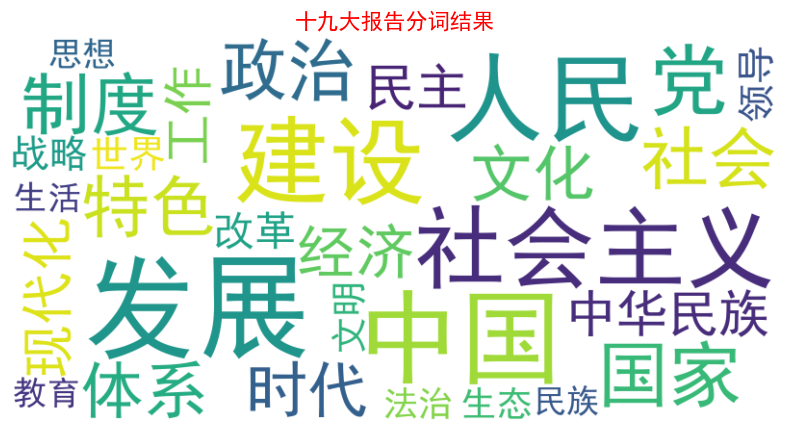

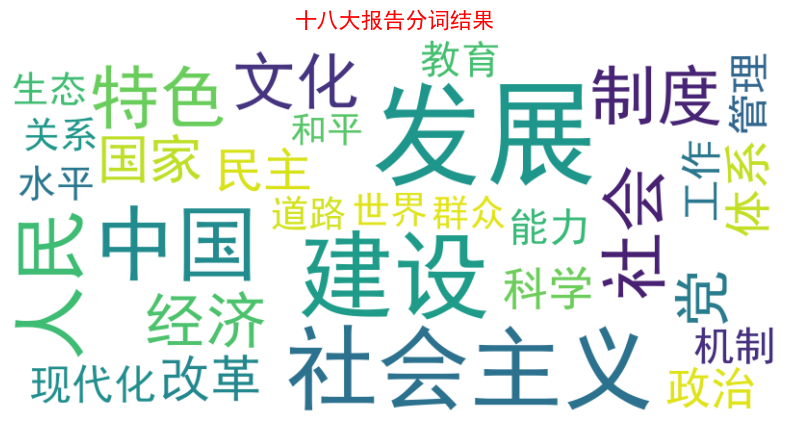

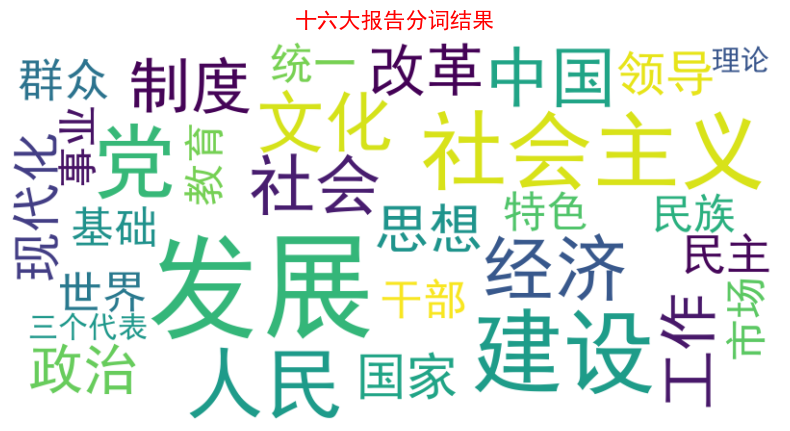

In [ ]:
import json
from wordcloud import WordCloud # 运用 wordcloud 库
import matplotlib.pyplot as plt
# 显示标题中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

with open('统计词频.json', 'r', encoding='utf-8') as f_obj:
    data = json.load(f_obj)

# 为每个文档生成词云
for doc_name, word_freq in data.items():
    top_words = dict(list(word_freq.items()))
    
    # 创建词云
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 字体路径，确保支持中文
        background_color='white',  # 背景颜色
        width=800,  # 图像宽度
        height=400,  # 图像高度
        max_words=30  # 最大显示单词数
    )
    
    # 生成词云
    wordcloud.generate_from_frequencies(top_words)
    
    # 保存词云图像
    output_file = f'十六大~二十大报告词云\\{doc_name}_wordcloud.png'
    wordcloud.to_file(output_file)
    
    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(doc_name,fontsize=16,color='red')
    plt.show()